In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from cleaning_pipeline import goods, full_prod_orders

# Use to reimport module if you make change to the .py
# importlib.reload(cleaning_pipeline)

In [45]:
from __future__ import print_function
from sklearn.cluster import KMeans
from PlottingFunctions import plot_inertia, plot_silhouette

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

### Cluster based on aggregate stats from Jordan
- K-Means with k = 3 based on elbow plot
- PCA of full and reduced datasets

In [91]:
user_summary = pd.read_csv('../data/user_summary.csv')
user_summary.sample(10)

,user_id,total_orders,total_products,min_products,max_products,med_products,avg_products,std_products,max_reordered,med_reordered,avg_reordered,std_reordered,mode_day_of_week,mode_hour_of_day,total_days,min_days,max_days,med_days,avg_days,std_days
29018,29019,14,186,2,24,13.5,13.285714,6.144774,1.000000,0.631222,0.561438,0.291456,0,13,169,8.0,30.0,28.0,22.934911,7.533372
8600,8601,64,834,2,27,12.0,13.031250,5.474236,1.000000,0.773504,0.693926,0.249745,1,10,813,0.0,29.0,4.0,5.885609,5.232567
64722,64723,5,45,3,25,4.0,9.000000,9.407444,0.333333,0.080000,0.122667,0.143419,0,18,41,6.0,30.0,14.0,17.243902,7.621616
112877,112878,4,9,1,3,2.5,2.250000,0.957427,1.000000,0.500000,0.500000,0.430331,[2 6],[15 21],7,10.0,30.0,26.0,20.857143,10.253919
205515,205516,19,176,1,22,8.0,9.263158,6.117753,1.000000,0.357143,0.415479,0.343098,0,19,165,0.0,30.0,4.0,8.587879,8.032698
125650,125651,6,23,1,6,4.0,3.833333,1.722401,1.000000,0.775000,0.619444,0.430815,4,16,19,6.0,30.0,22.0,17.684211,9.849155
14985,14986,25,239,2,25,8.0,9.560000,5.439669,1.000000,0.636364,0.636136,0.344559,5,[ 6 11 14],218,4.0,30.0,7.0,9.711009,6.587516
126170,126171,22,151,1,14,7.0,6.863636,3.468161,1.000000,0.477273,0.483096,0.342036,0,20,147,1.0,30.0,6.0,9.755102,7.187882
116240,116241,36,427,2,31,11.0,11.861111,7.514378,1.000000,1.000000,0.817186,0.245636,0,17,400,1.0,23.0,8.0,10.365000,6.642823
93208,93209,6,216,23,51,36.0,36.000000,11.313708,0.875000,0.633540,0.576657,0.313547,3,12,165,3.0,27.0,14.0,13.945455,9.019122


In [18]:
user_summary = user_summary.drop(['mode_day_of_week', 'mode_hour_of_day'],axis=1)

In [25]:
kmeans = KMeans()
kmeans.set_params(n_clusters=3)
kmeans.fit(user_summary)

# plot_inertia(kmeans, user_summary.iloc[:,0:2].values, range(1, 10))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

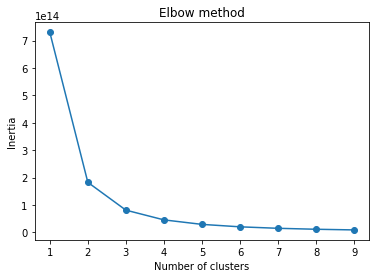

In [23]:
# Use K = 3
plot_inertia(kmeans, user_summary, range(1, 10))

In [28]:
# K-means evenly split the groups. Seems suspicious
pd.Series(kmeans.labels_)

1    68857
2    68737
0    68615
dtype: int64

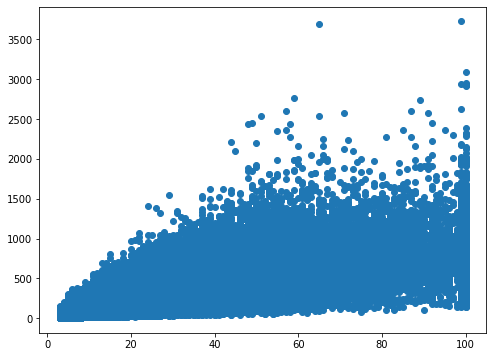

In [90]:

plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(user_summary.total_orders, user_summary.total_products)
plt.show()

In [77]:
pca_users = user_summary.drop('user_id', axis=1)

scaler = StandardScaler()
scaler.fit(pca_users)
users_scaled = scaler.transform(pca_users)


In [86]:
pc_list = range(1, len(pca_users.columns.tolist())+1)
pc_number = ['PC'+str(i) for i in pc_list]

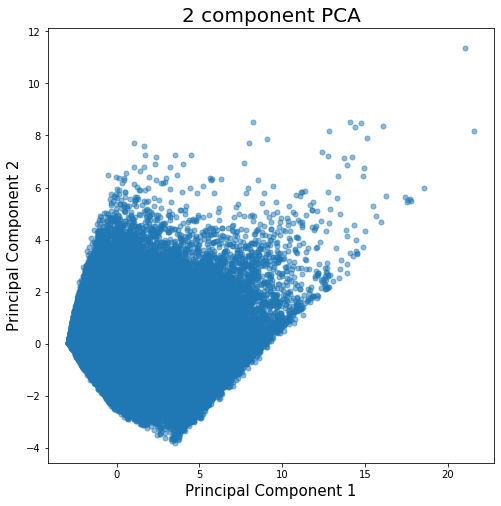

In [93]:
pca = PCA()
principalComponents = pca.fit_transform(users_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_number)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC2']],
            s = 25, alpha=0.5)


In [88]:
pca.explained_variance_ratio_

array([3.35896650e-01, 2.38474891e-01, 1.20463163e-01, 9.62285285e-02,
       7.81324471e-02, 5.09846463e-02, 2.76148521e-02, 2.00146404e-02,
       9.95736706e-03, 7.47169529e-03, 5.59076239e-03, 4.01561586e-03,
       1.85522603e-03, 1.71216164e-03, 1.20478234e-03, 3.66078414e-04,
       1.64917395e-05])

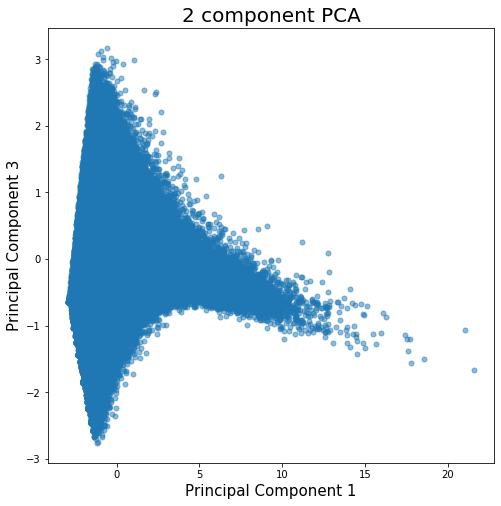

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC3']],
            s = 25, alpha=0.5)

[9.97750908e-01 1.46875328e-03 4.00957707e-04 2.99282298e-04
 7.97782397e-05 3.20925826e-07]


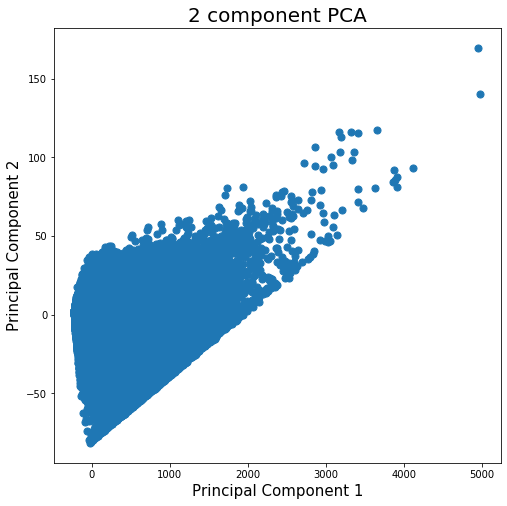

In [89]:
# Make reduced PCA using fewer stats
new_list = user_summary.columns.tolist()[:-1]
indices = [1,2,6,10,12,-1]
subset_list = [new_list[i] for i in indices]
reduced_users = user_summary[subset_list]

pc_list = range(1, len(reduced_users.columns.tolist())+1)
pc_number = ['PC'+str(i) for i in pc_list]


scaler = StandardScaler()
scaler.fit(reduced_users)
users_scaled = scaler.transform(reduced_users)

pca = PCA()
principalComponents = pca.fit_transform(reduced_users)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_number)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC2']],
            s = 50)
print(pca.explained_variance_ratio_)

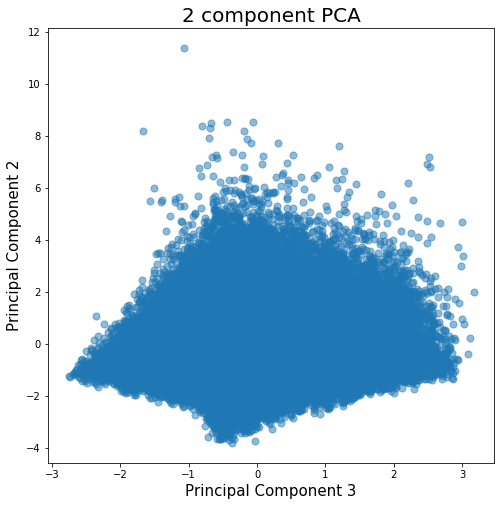

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC3']],
           principalDf[['PC2']],
            s = 50, alpha=0.5)

## Clustering based on Department


1. Make a table with number items bought in each dept  by customer
2. Make a table with items bought per aisle by each customer
2. create a purchase summary matrix:
    - columns representing each product available for purchase
    - rows representing each customer
    - then use sparse matrix?
    
    

In [2]:
dept_user_df = full_prod_orders.groupby(['user_id','department'], as_index=False).product_id.agg('count')
dept_user_df = dept_user_df.pivot(index='user_id', columns='department', values = 'product_id')
dept_user_df = dept_user_df.fillna(0)

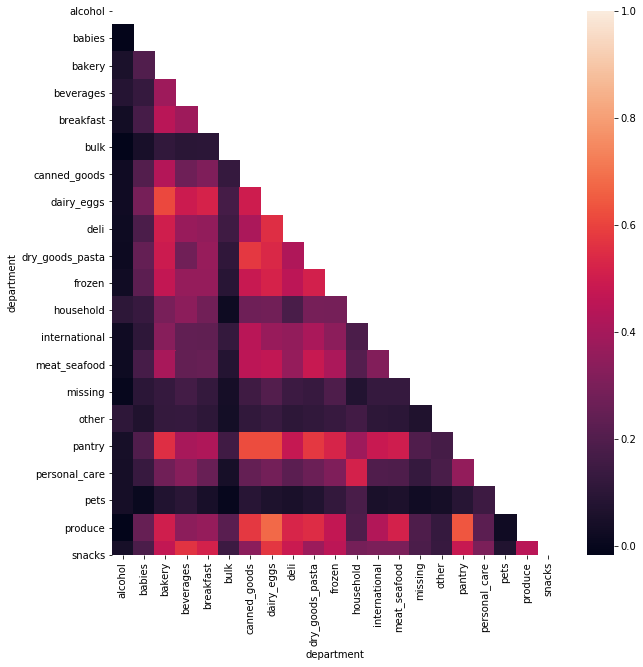

In [49]:
# Which departments are correlated with each other?
plt.figure(figsize=(10,10))
matrix_ = np.triu(dept_user_df.corr())
sns.heatmap(dept_user_df.corr(), mask=matrix_)

In [57]:
corr_ = dept_user_df.corr()
corr_.produce.sort_values(ascending=False)

department
produce            1.000000
dairy_eggs         0.681753
pantry             0.641524
canned_goods       0.575268
dry_goods_pasta    0.549380
deli               0.529558
meat_seafood       0.519165
bakery             0.503731
frozen             0.470107
snacks             0.446274
international      0.431822
breakfast          0.363398
beverages          0.344518
babies             0.252905
personal_care      0.221652
bulk               0.218941
missing            0.191358
household          0.190607
other              0.126151
pets               0.026537
alcohol           -0.016976
Name: produce, dtype: float64

In [67]:
corr_.other.sort_values(ascending=False)

department
other              1.000000
personal_care      0.178739
pantry             0.166465
household          0.161164
dairy_eggs         0.134856
frozen             0.130909
snacks             0.130750
beverages          0.126744
produce            0.126151
bakery             0.124787
canned_goods       0.116117
dry_goods_pasta    0.114326
alcohol            0.109088
deli               0.104364
international      0.104023
breakfast          0.102228
meat_seafood       0.100583
missing            0.067892
babies             0.067667
pets               0.042348
bulk               0.036791
Name: other, dtype: float64

#### Conclusions from Correlation
- High correlation of produce, dairy/eggs, and pantry items
- Babies does not have any strong correlation
    - highest corr is 0.289, dairy/eggs
- Dairy/Eggs correlates with many other categories
- Alcohol, pets, missing and other don't have any strong correlations
    - all less than 0.25



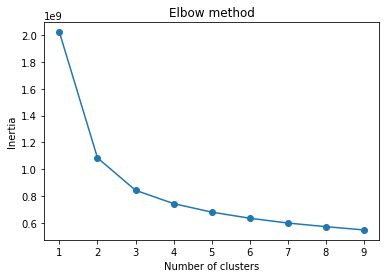

In [18]:
kmeans = KMeans()
plot_inertia(kmeans, dept_user_df, range(1, 10))

In [24]:
# K-means for using 9 clusters
pd.Series(kmeans.labels_).value_counts()

2    112472
6     46534
0     18797
4     10379
3      7321
7      5130
1      3870
5      1052
8       654
dtype: int64

In [25]:
kmeans.set_params(n_clusters=4)
kmeans.fit(dept_user_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
# Labelling for clustering (n=4) based on departments
pd.Series(kmeans.labels_).value_counts()

1    144304
3     43066
0     14826
2      4013
dtype: int64

### Only cluster 2 seems to be good. The other are split and the average silhouette is fairly low (~0.43)

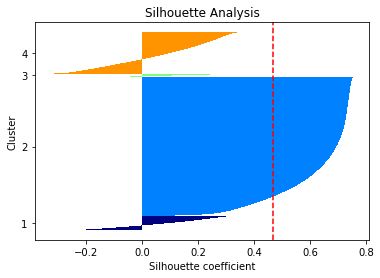

In [27]:
plot_silhouette(kmeans, dept_user_df)

[0.33397847 0.07067118 0.05505058 0.04896564 0.04694047 0.04618963
 0.04428226 0.0425223  0.03970035 0.03301199 0.0308228  0.0284708
 0.02652981 0.02455423 0.02305279 0.02163271 0.01995585 0.01865198
 0.01801641 0.01476526 0.01223449]


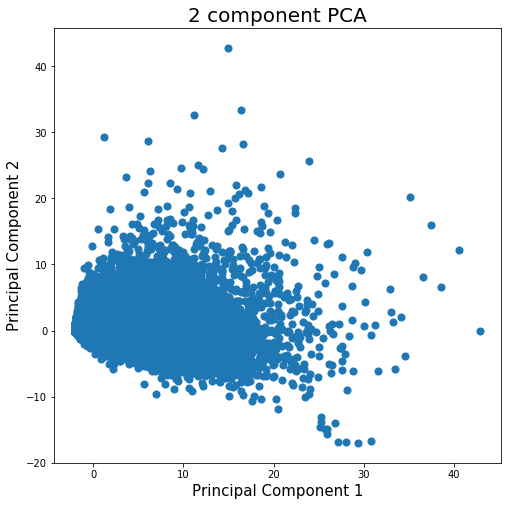

In [39]:
# Scale data 
scaler = StandardScaler()
scaler.fit(dept_user_df)
users_scaled = scaler.transform(dept_user_df)

pc_list = range(1, len(dept_user_df.columns.tolist())+1)
pc_number = ['PC'+str(i) for i in pc_list]

# build PCA
pca = PCA()
principalComponents = pca.fit_transform(users_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_number)

# Plot PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC2']],
            s = 50)
print(pca.explained_variance_ratio_)

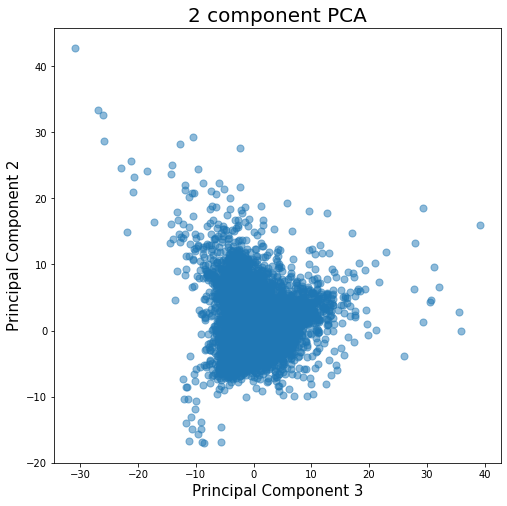

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC3']],
           principalDf[['PC2']],
            s = 50, alpha=0.5)

### To Do:
   - Build DF for % items bought per department for each user
   - Run Correlation of departments against each other to check for relationships
   - Run Elbow plot and K-means
   - Repeat for Aisle

In [3]:
# 34782 shoppers bought baby items
# Max = 821, Mean = 12.6, Median = 4 
parents = dept_user_df[dept_user_df.babies >0]
parents.to_csv('../data/parents.csv')
# 15484 shoppers who bought pet items
# Max = 522
# Median = 3, Mean = 6.6
pet_owners = dept_user_df[dept_user_df.pets >0]
pet_owners.to_csv('../data/pet_owners.csv')
# 16104 shoppers bought alcohol
# One shopper bought 685 alcohol items
# median = 4, avg = 9.9
drinkers = dept_user_df[dept_user_df.alcohol >0]
drinkers.to_csv('../data/drinkers.csv')

(array([1.4886e+04, 8.1000e+02, 2.1700e+02, 8.6000e+01, 4.3000e+01,
        2.5000e+01, 1.2000e+01, 5.0000e+00, 9.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,  28.36,  55.72,  83.08, 110.44, 137.8 , 165.16, 192.52,
        219.88, 247.24, 274.6 , 301.96, 329.32, 356.68, 384.04, 411.4 ,
        438.76, 466.12, 493.48, 520.84, 548.2 , 575.56, 602.92, 630.28,
        657.64, 685.  ]),
 <a list of 25 Patch objects>)

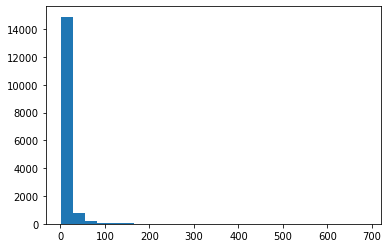

In [93]:
plt.hist(drinkers.alcohol, bins = 25)

In [96]:
parents.babies.median()

4.0